# TF 2.0 alpha - Basic Classification

## Train a Neural Network to Classify Images of Clothing

### The Fashion MNIST dataset - 70,000 greyscale images, 10 categories
### Each image, an article of clothing - 28 x 28 pixels

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0-alpha0


### Data can be accessed from TF - 60,000 Training, 10,000 Test images

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


### Dataset has been downloaded as 4 NumPy arrays

#### the images are 28 x 28 NumPy arrays - pixels from 0 to 255
#### the labels are an array of integers - from 0 to 9

In [42]:
# Class Names need to be added with this data set - store them for later

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## EXPLORE the DATA

In [11]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
print(len(train_labels))
print(len(test_labels))

60000
10000


In [9]:
train_labels

# each label is an integer, 0 - 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## PREPROCESS the DATA

### Data must be Preprocessed - Before, training the network

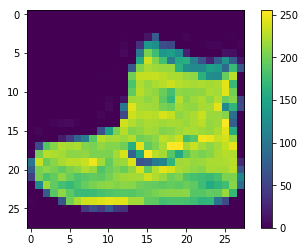

In [14]:
# inspect the 1st image

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### pixel values fall between 255 - 0

### Normalize these values to a range between 0 - 1, prior to model input

In [15]:
train_images = train_images / 255
test_images = test_images / 255

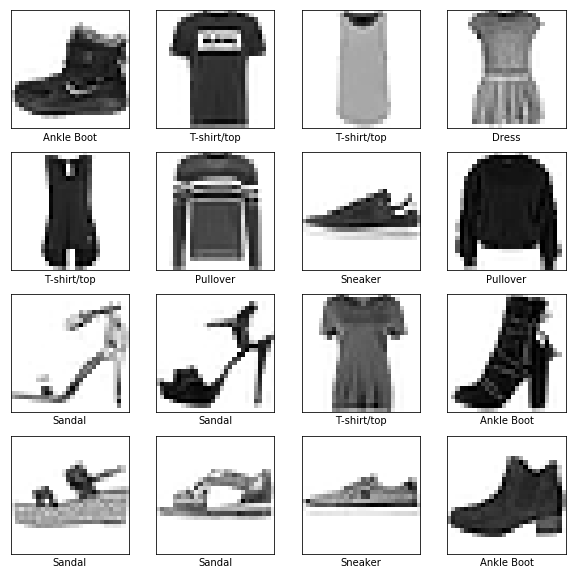

In [16]:
# Display the 1st 16 training images, class name below each

plt.figure(figsize=(10,10))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## BUILD the MODEL

#### Configure the layers of the neural network - then Compile the model

### Configure Layers
#### layers extract representations from input they receive
#### most layers have parameters that are learned during training

In [19]:
# 1st layer - transforms images from 2D to 1D arrays (no parameters to learn)
# 2nd layer - Dense layer of 128 nodes
# 3rd layer - Dense 10 node softmax (returns array - 10 probability scores)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compile the Model

In [20]:
# OPTIMIZER - how model updates, based on data and loss function
# LOSS Function - measures model accuracy during training, want to minimize
# METRICS - monitor training/test steps (accuracy=fraction of correct classified)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## TRAIN Model

In [23]:
# Feed training data into model - model learns to associate labels/images

model.fit(train_images, train_labels, epochs=7)

Epoch 1/7
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2831 - accuracy: 0.8948
Epoch 2/7
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2695 - accuracy: 0.9000
Epoch 3/7
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2580 - accuracy: 0.9027
Epoch 4/7
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2483 - accuracy: 0.9075
Epoch 5/7
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2395 - accuracy: 0.9114
Epoch 6/7
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2307 - accuracy: 0.9133
Epoch 7/7
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2225 - accuracy: 0.9167


#### As model trains, the loss and accuracy are tracked
#### After 5 prior epochs, then 7 more - Accuracy reached 91 % (on the TRAINING data)

In [24]:
# See how model performs on TEST data

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.3377 - accuracy: 0.8863

Test accuracy: 0.8863


#### Test Accuracy 88 %  -  slightly lower than Training Accuracy  -  slight Overfitting

## Make PREDICTIONS

In [26]:
# predict labels for each image in the Test set - check 1st prediction

predictions = model.predict(test_images)
predictions[0]

array([1.0678137e-06, 2.3989813e-10, 1.3092393e-09, 1.1067231e-12,
       1.7825666e-11, 6.9684240e-05, 6.2489420e-08, 2.3450896e-03,
       5.6286972e-08, 9.9758410e-01], dtype=float32)

In [27]:
# prediction is array of 10 numbers  
# model confidence of image match to 10 clothing article choices - which is highest?

np.argmax(predictions[0])

9

In [29]:
# class_names[9] corresponds to 'Ankle Boot' - double check with known Test label

test_labels[0]

9

### GRAPH the set of 10 Channels to view the match

In [43]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))

In [44]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
               
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

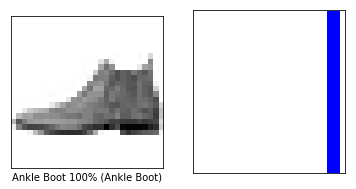

In [45]:
# Look at the 1st image, predictions, and prediction array

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

plt.show()

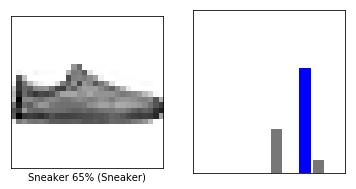

In [46]:
# look at the 13th image, predictions, and prediction array

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2,)
plot_value_array(i, predictions, test_labels)

plt.show()

## PLOT several images with their predictions and arrays

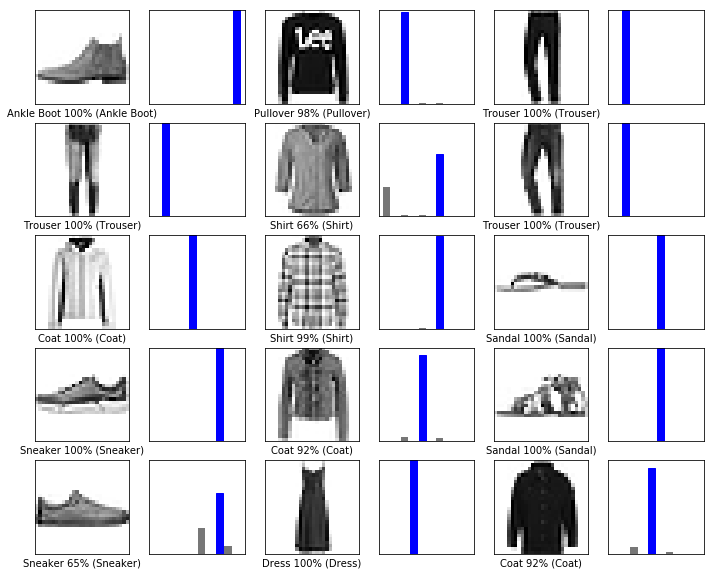

In [47]:
# Note - predictions can be wrong even with High confidence

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

plt.show()

### Use model to make a prediction about a Single image

In [48]:
# grab an image from Test data set
img = test_images[0]

print(img.shape)

(28, 28)


### NOTE - tf.keras modules are optimized for Batch predictions (even w Single image, must add to list)

In [49]:
# add image to Batch - where it is the only member
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


### Predict the Image

In [50]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.0678096e-06 2.3989674e-10 1.3092367e-09 1.1067189e-12 1.7825599e-11
  6.9684305e-05 6.2489185e-08 2.3450819e-03 5.6286652e-08 9.9758410e-01]]


In [52]:
# model.predict - returns a list of lists - each image in the batch
# focus on the 1 image we want

np.argmax(predictions_single[0])

9

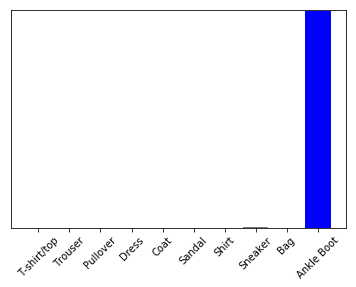

In [51]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)